#### Diabetes Prediction

In [186]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
import joblib

In [187]:
# read the dataset
data = pd.read_csv("diabetes.csv")


In [188]:
## read the first few and last few data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [189]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [190]:
### info about the data

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [192]:
## describe the statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### check null value

In [193]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

<Figure size 1296x864 with 0 Axes>

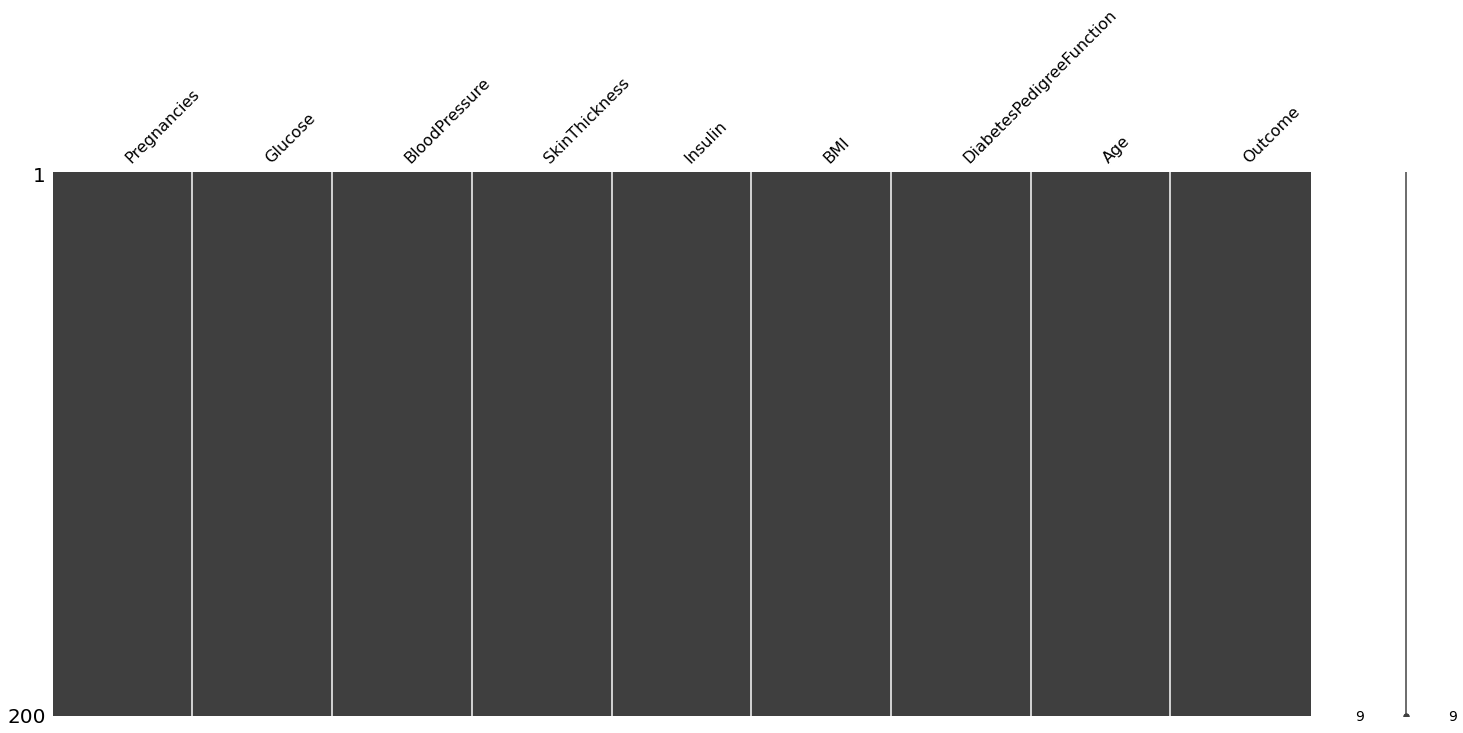

In [194]:
# visualize the missing values for sample of 200
plt.figure(figsize = (18,12))
msno.matrix(data.sample(200))

<AxesSubplot:>

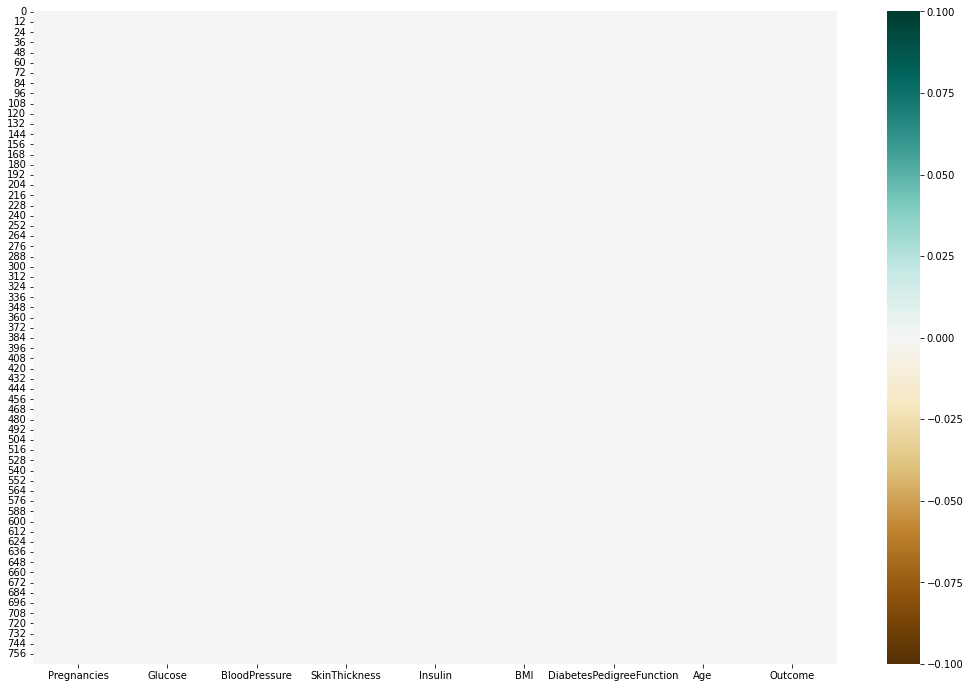

In [195]:
plt.figure(figsize = (18,12))
sns.heatmap(data.isna(),cmap='BrBG')

he dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

In [196]:
#### check skewness and kurtosis
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [197]:
data.kurt()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

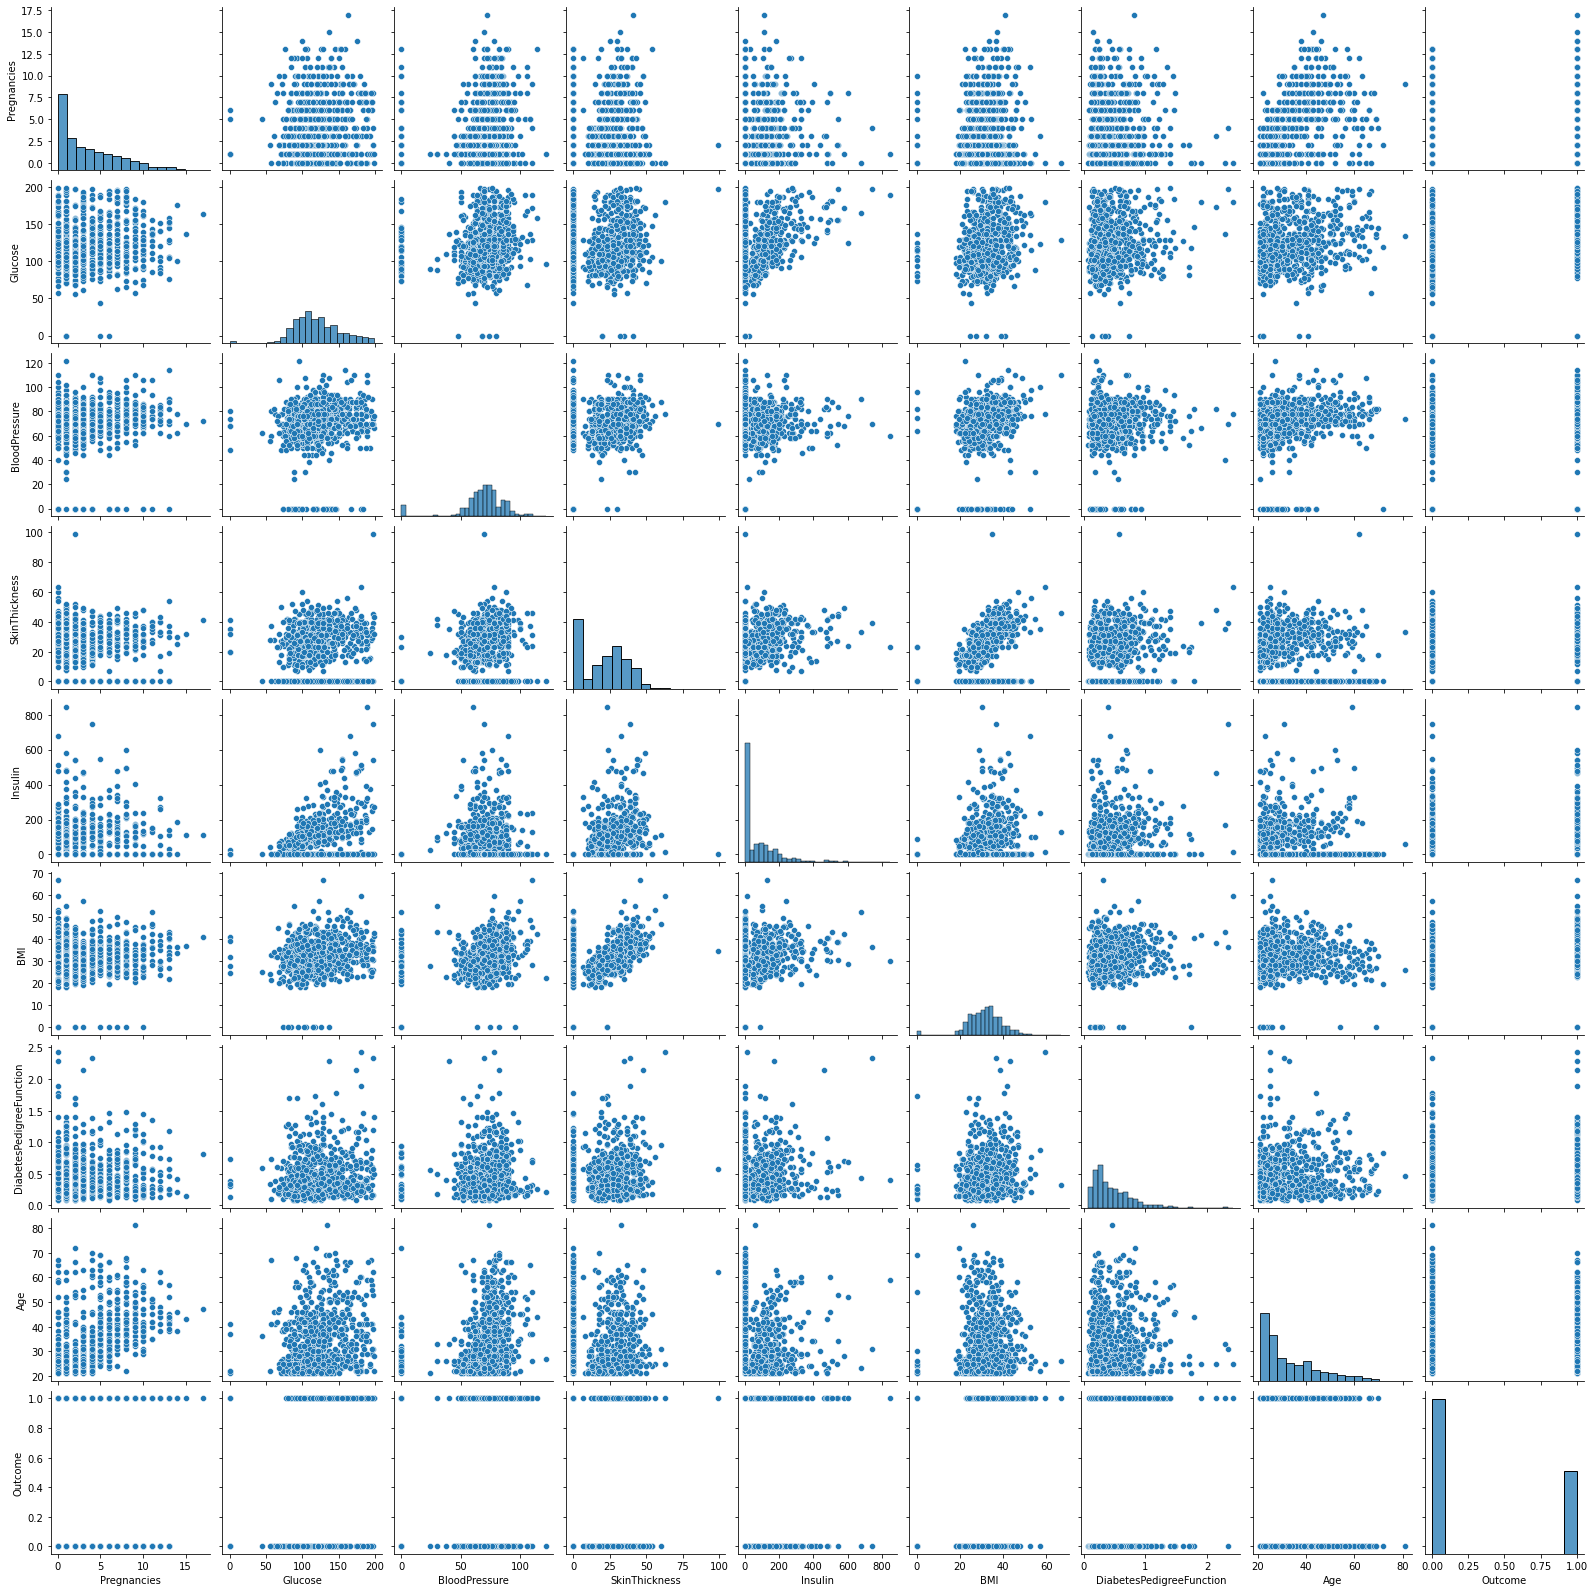

In [198]:
sns.pairplot(data = data)

##### Correlation report

<AxesSubplot:>

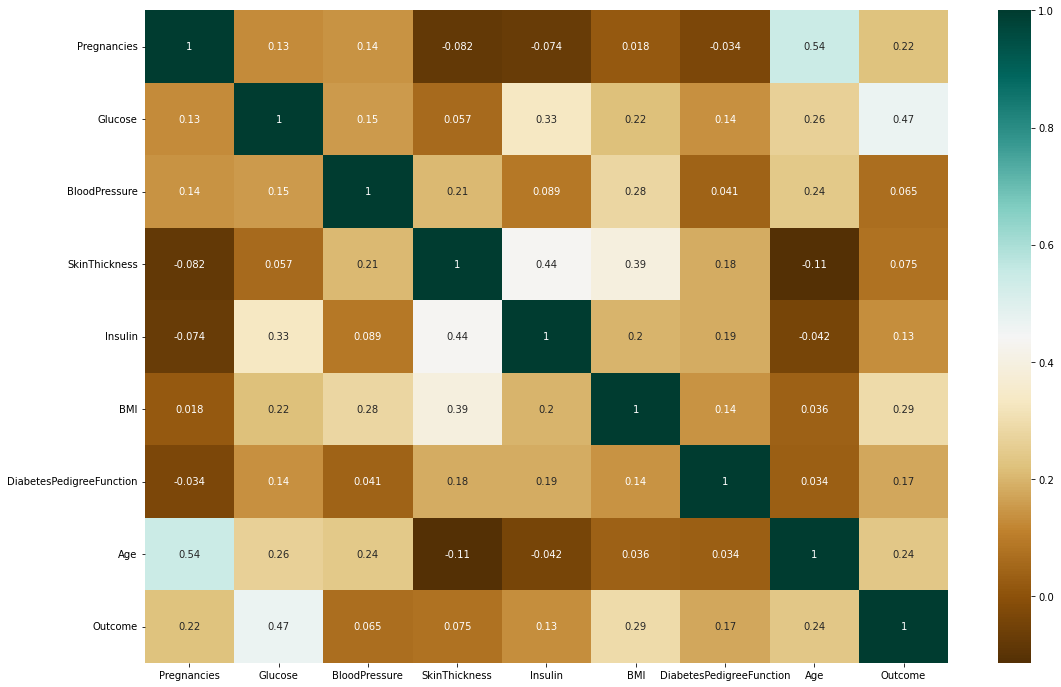

In [199]:
correlation = data.corr()
plt.figure(figsize = (18,12))
sns.heatmap(correlation, cmap = 'BrBG', annot = True)

In [200]:
corr_report = data.corr()['Outcome']
print(corr_report)

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


#### Dist plot for the visualization

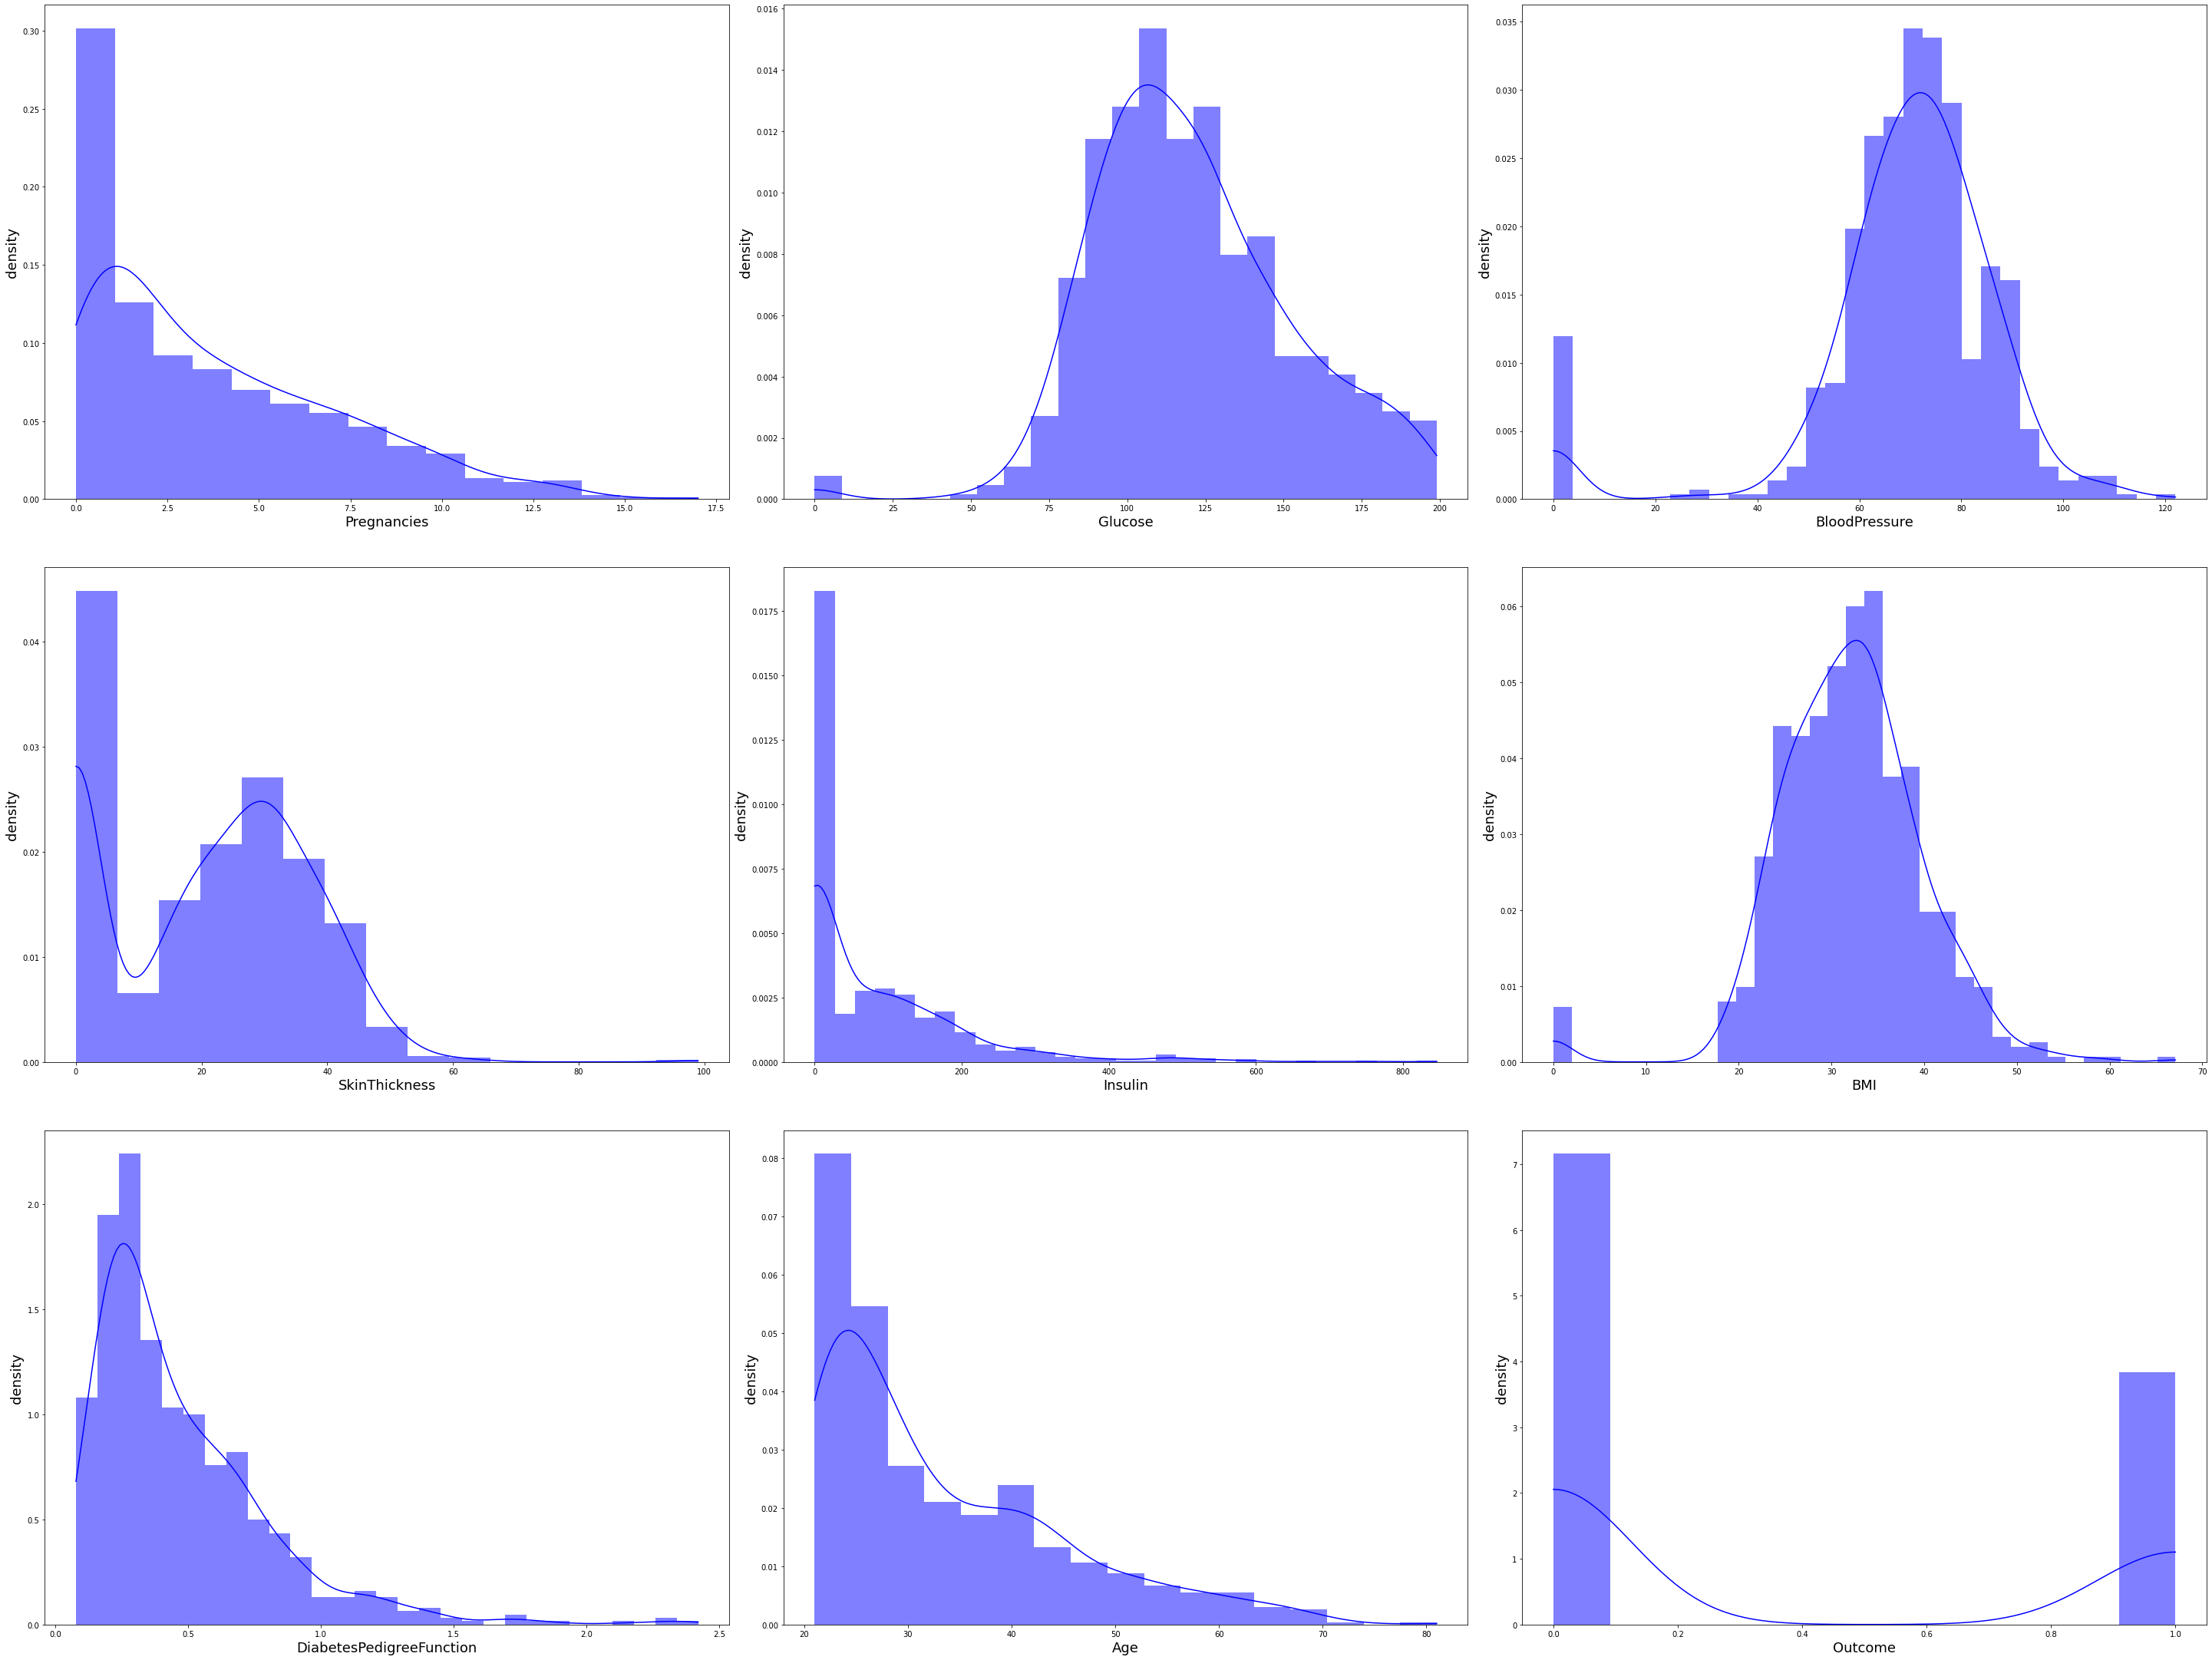

In [201]:
# create hist and kde plots to observe the data distribution
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(40,30))
index = 0
ax = ax.flatten()

for col, value in data.items():
    col_dist = sns.histplot(value, ax=ax[index], color='blue',kde=True, stat="density", linewidth=0)
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


#### Check the outliers

In [202]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


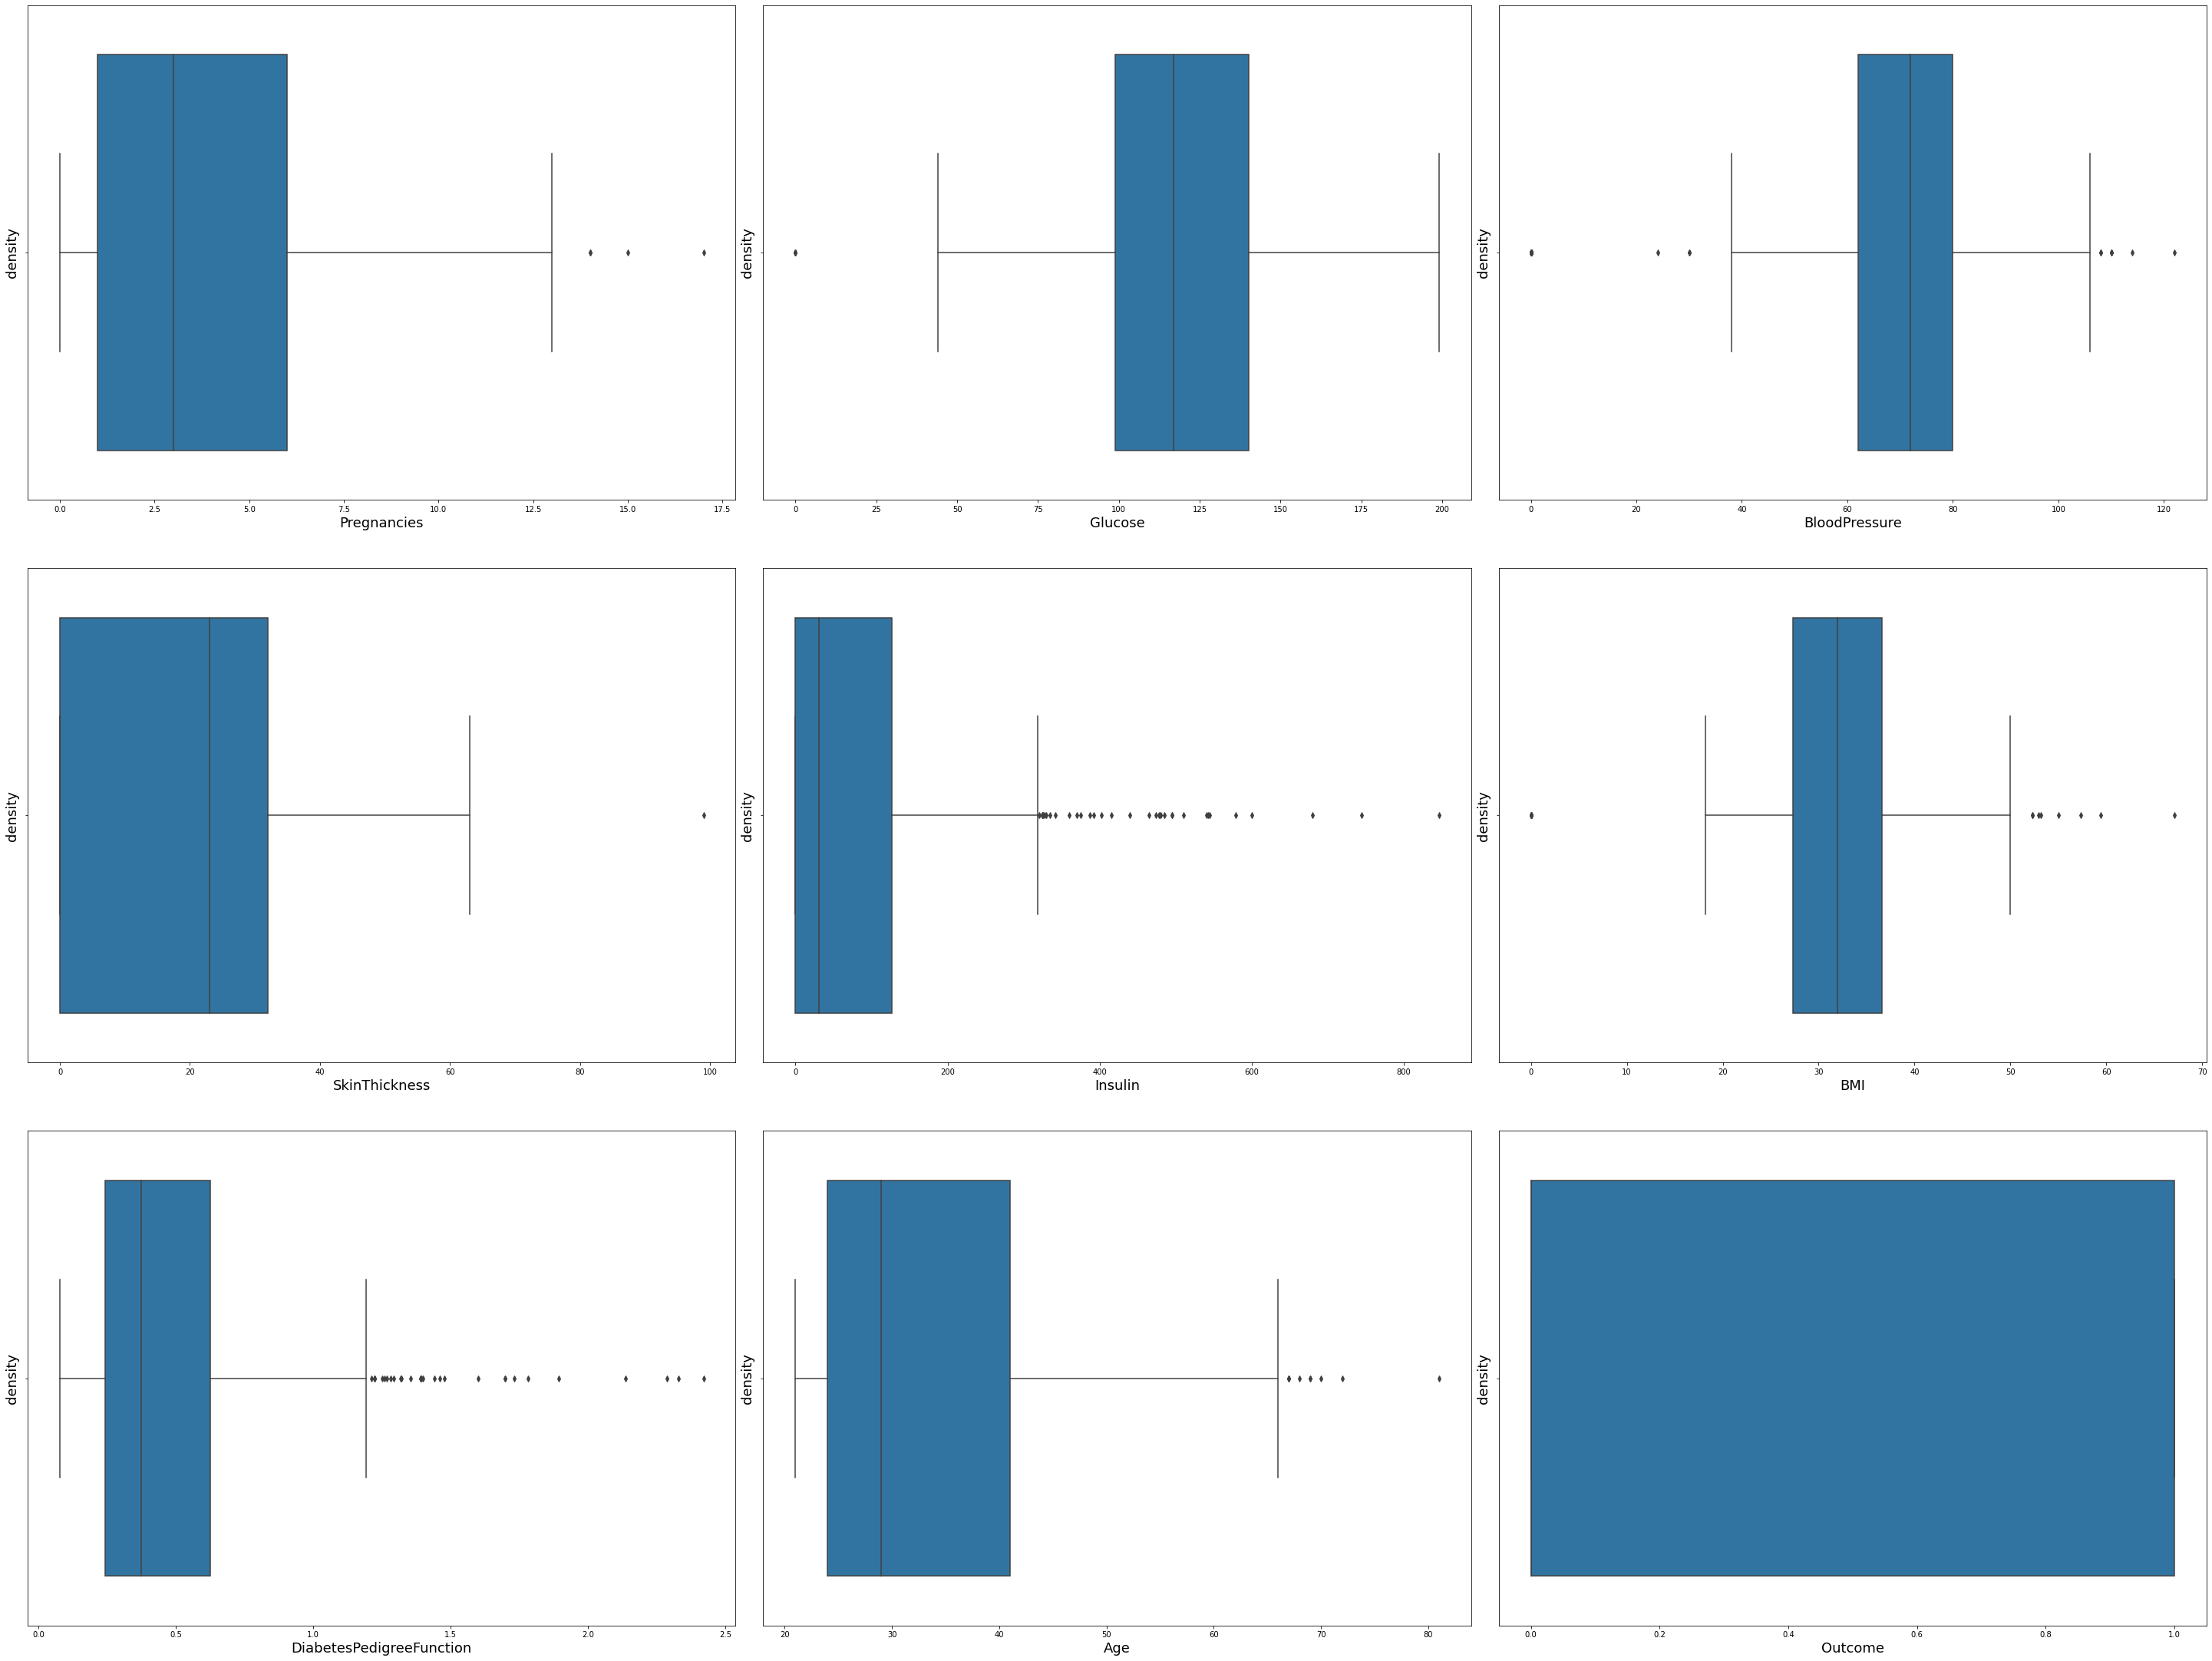

In [203]:
# create hist and kde plots to observe the data distribution
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(40,30))
index = 0
ax = ax.flatten()

for col, value in data.items():
    col_dist = sns.boxplot(value, ax=ax[index])
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


#### looking at the box plot , we see some outliers

In [204]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [205]:

# remove the outlier

data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1)]
data.shape


(639, 9)

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies'>

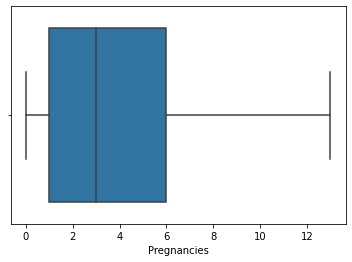

In [206]:
sns.boxplot(data["Pregnancies"])

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

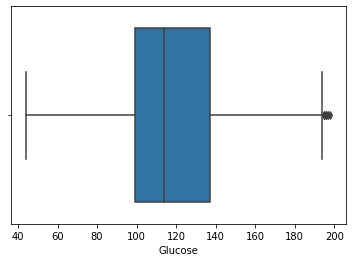

In [207]:
sns.boxplot(data["Glucose"])

In [208]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinThickness'>

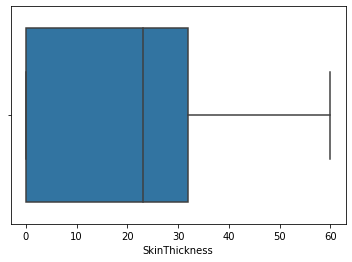

In [209]:
sns.boxplot(data['SkinThickness'])

##### See the boxplot report of everything

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


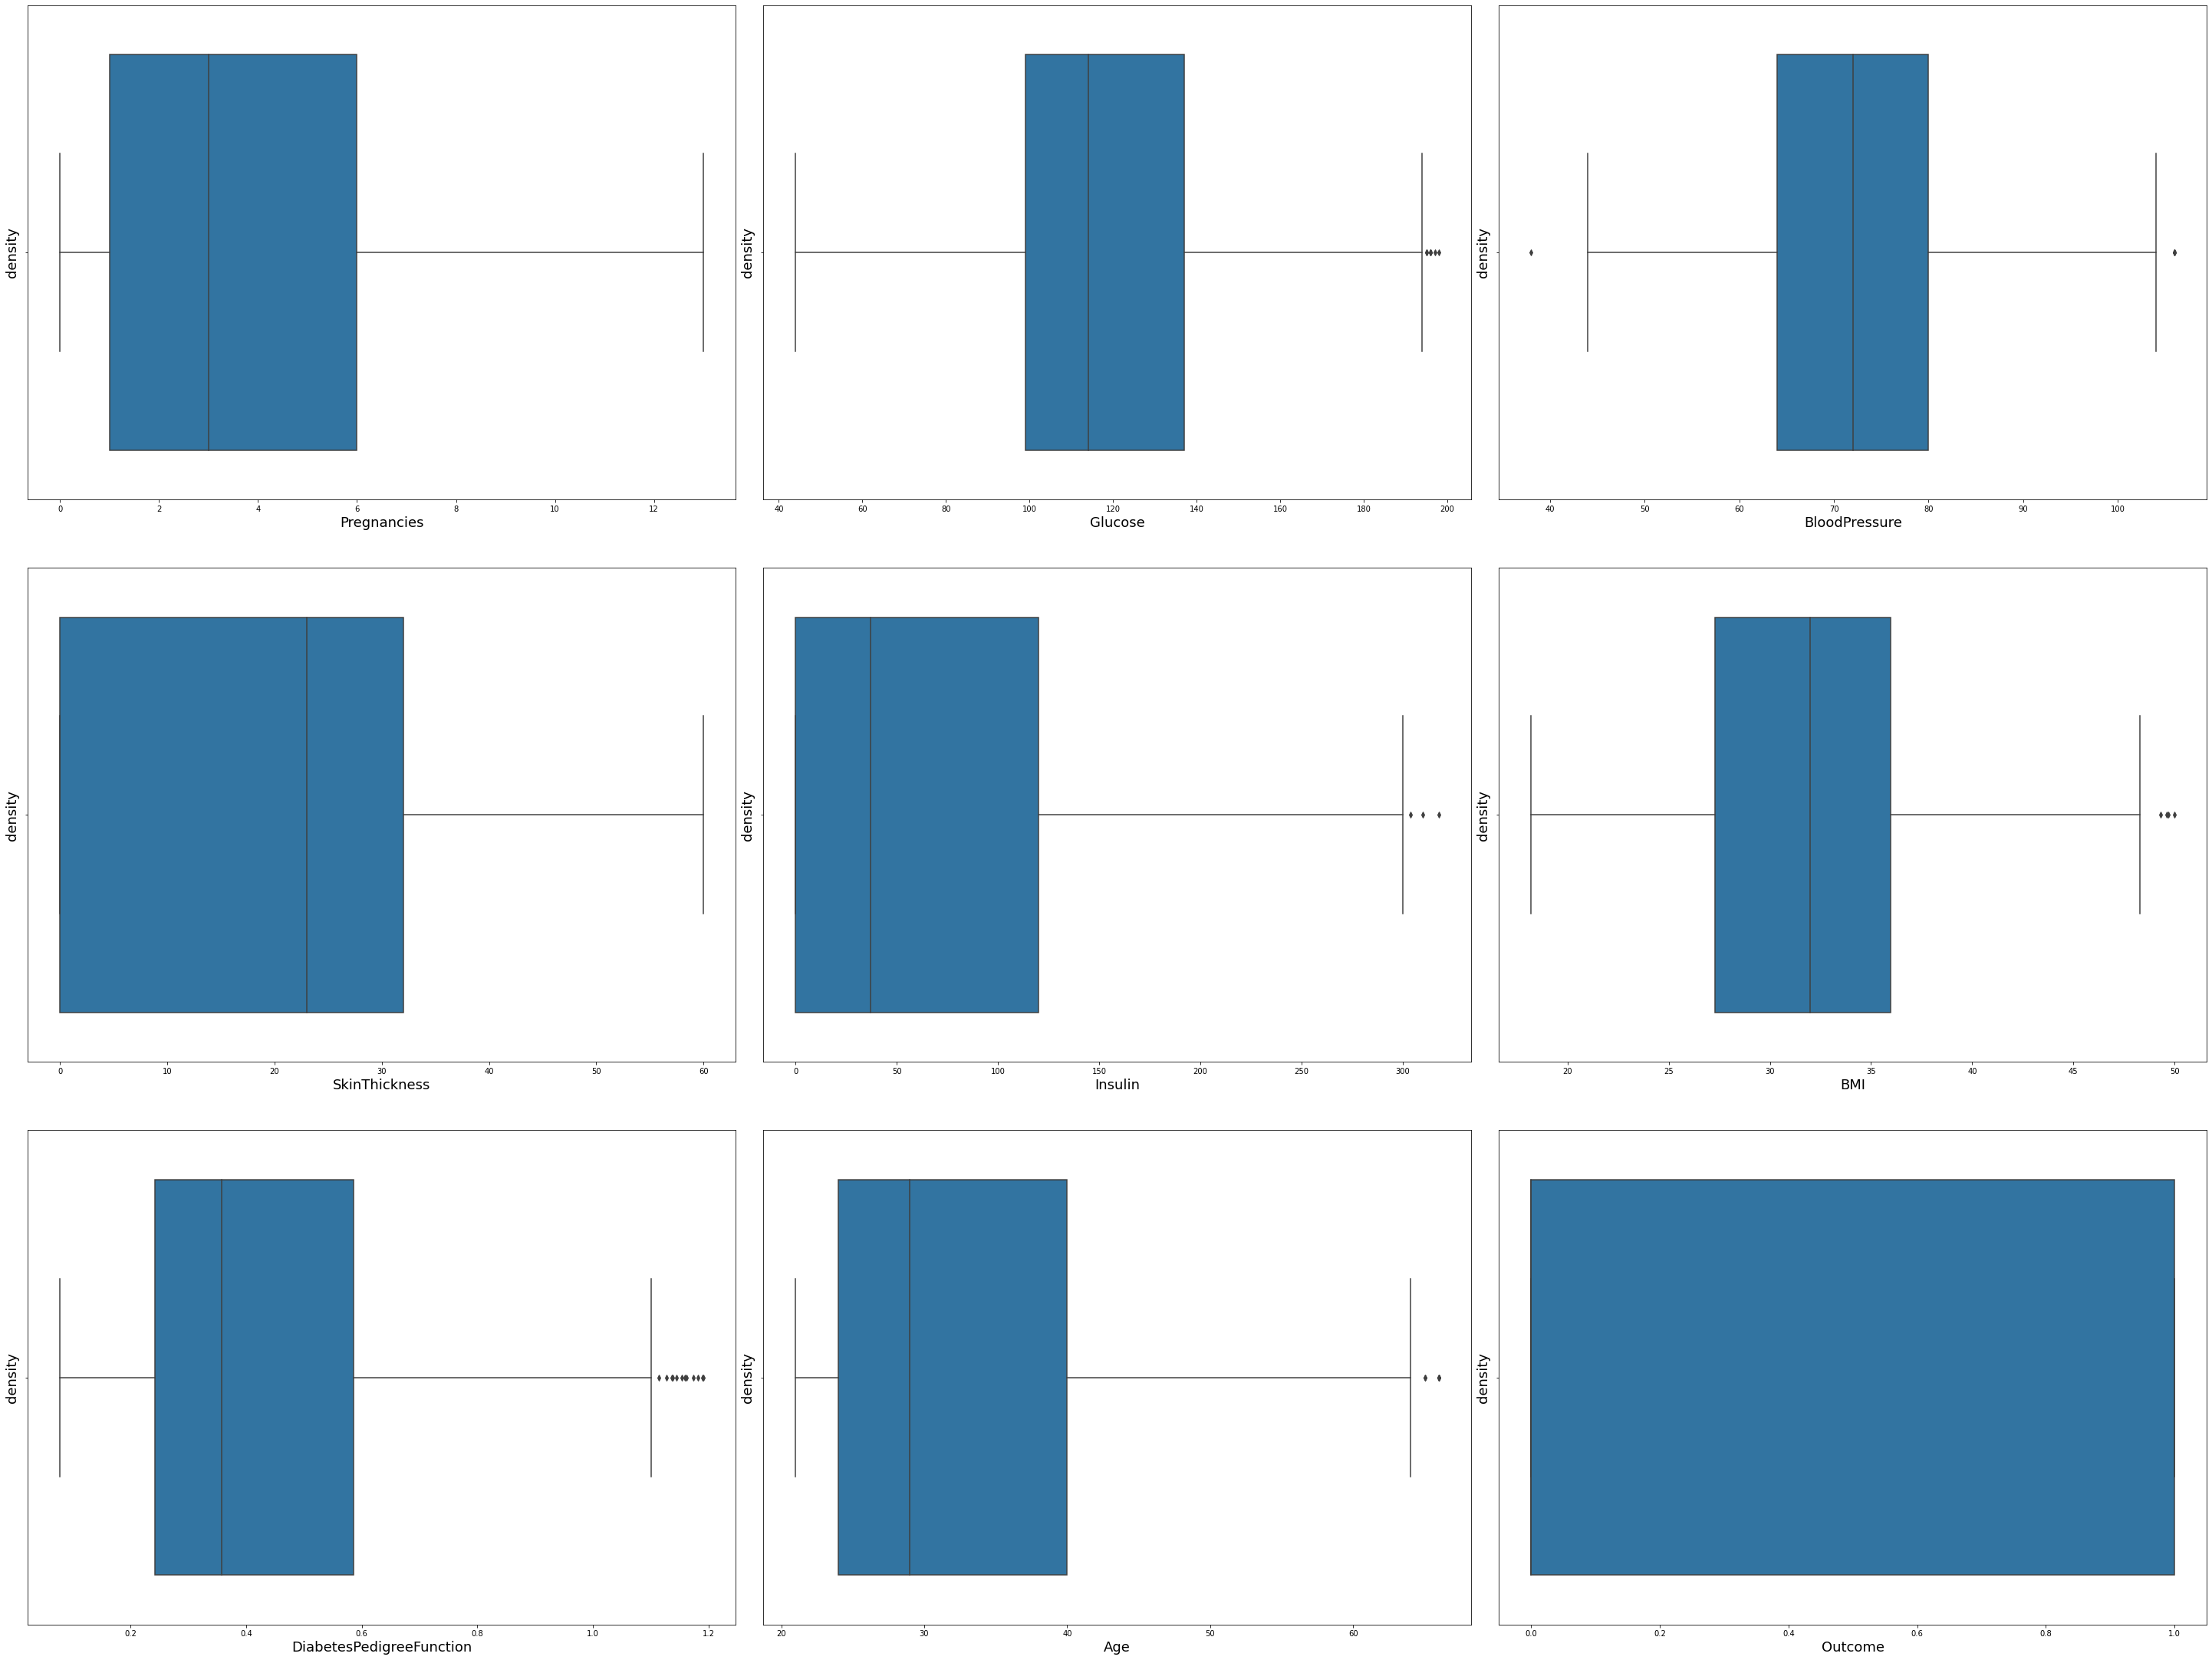

In [210]:
# create hist and kde plots to observe the data distribution
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(40,30))
index = 0
ax = ax.flatten()

for col, value in data.items():
    col_dist = sns.boxplot(value, ax=ax[index])
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


##### outliers are gone

In [211]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

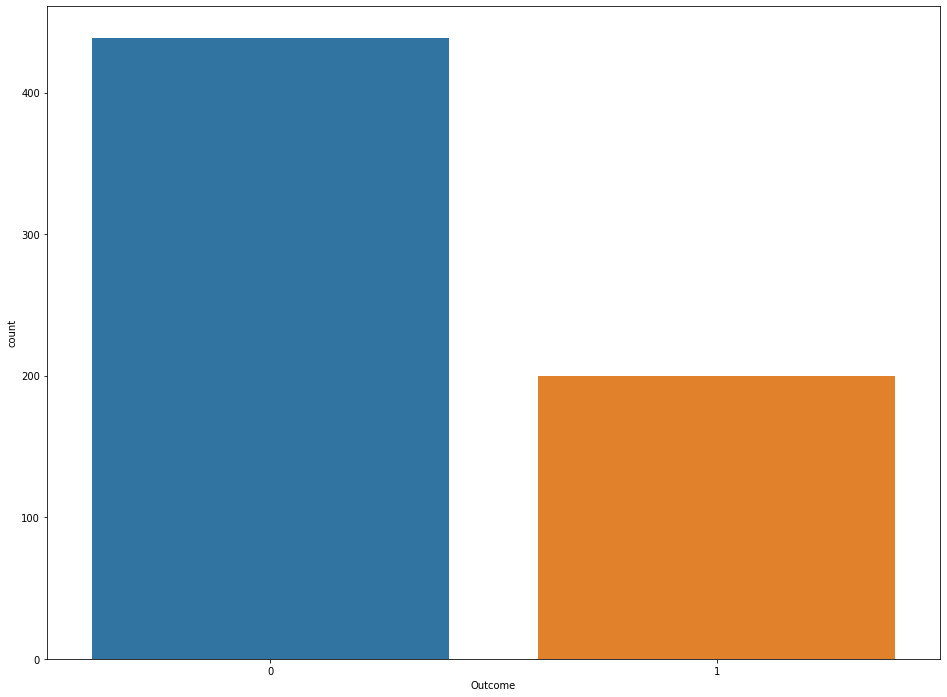

In [212]:
plt.figure(figsize = (16,12))
sns.countplot(data["Outcome"])

In [213]:
count = data["Outcome"].value_counts()
print(count)

0    439
1    200
Name: Outcome, dtype: int64


#### Relation between Pregnancies and BMI

In [214]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

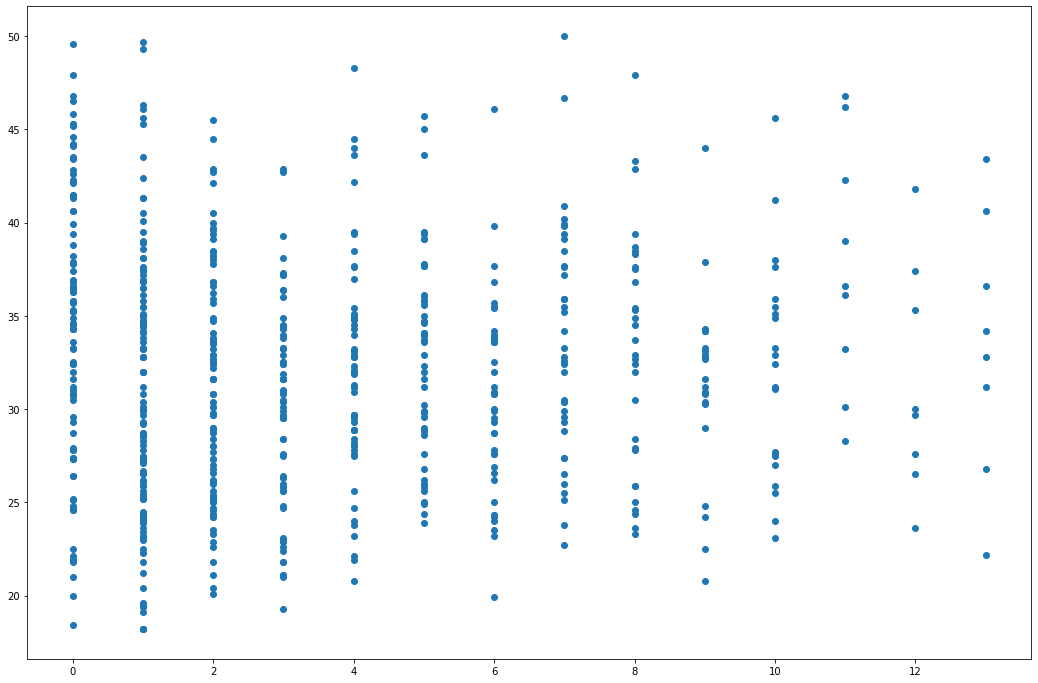

In [215]:
plt.figure(figsize = (18,12))
plt.scatter(data["Pregnancies"],data["BMI"])

In [216]:
data["Pregnancies"].unique()

array([ 6,  1,  8,  5,  3,  4, 10,  0,  7,  9, 11, 13,  2, 12])

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

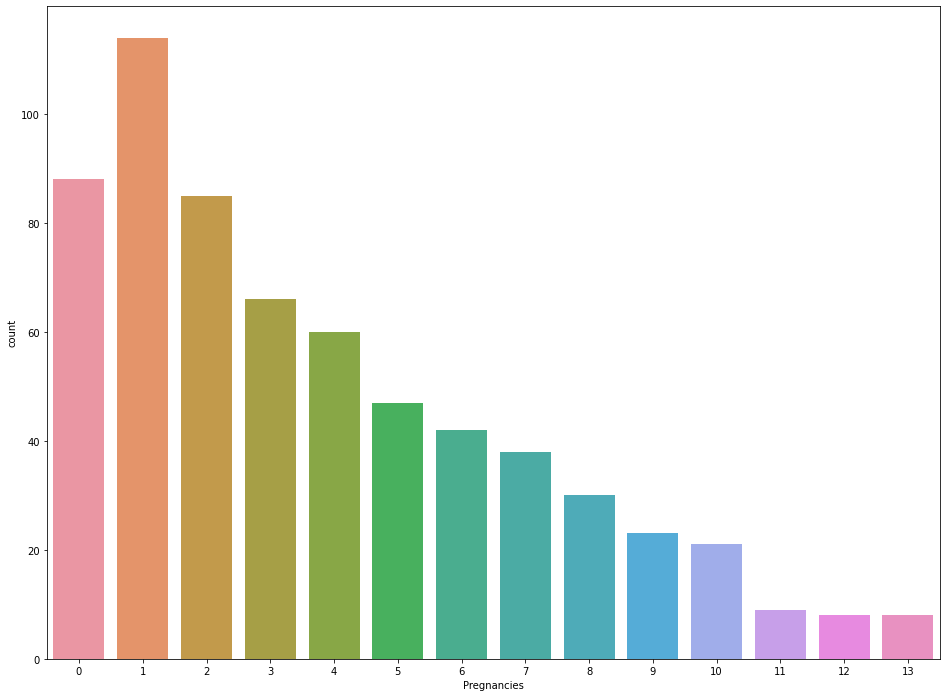

In [217]:
plt.figure(figsize = (16,12))
sns.countplot(data["Pregnancies"])

In [218]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

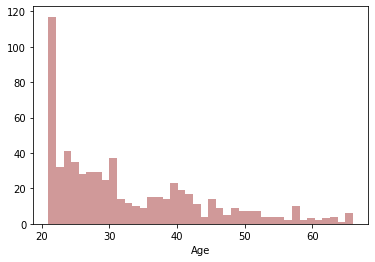

In [219]:
#### Some Distribution plot
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)


In [220]:
data.groupby(data["BloodPressure"])["Outcome"].sum()

BloodPressure
38      0
44      0
46      0
48      1
50      3
52      2
54      2
55      0
56      1
58      2
60      5
61      0
62      8
64     12
65      1
66     10
68      8
70     18
72     13
74     16
75      1
76     14
78     12
80     11
82      8
84     11
85      2
86      9
88      9
90     10
92      3
94      3
95      0
96      0
98      0
100     1
102     1
104     2
106     1
Name: Outcome, dtype: int64

In [221]:
y = data["Outcome"].copy()
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [222]:
X = data.drop("Outcome",axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


#### Age histogram

(array([225., 111.,  73.,  53.,  70.,  32.,  30.,  14.,  17.,  14.]),
 array([21. , 25.5, 30. , 34.5, 39. , 43.5, 48. , 52.5, 57. , 61.5, 66. ]),
 <BarContainer object of 10 artists>)

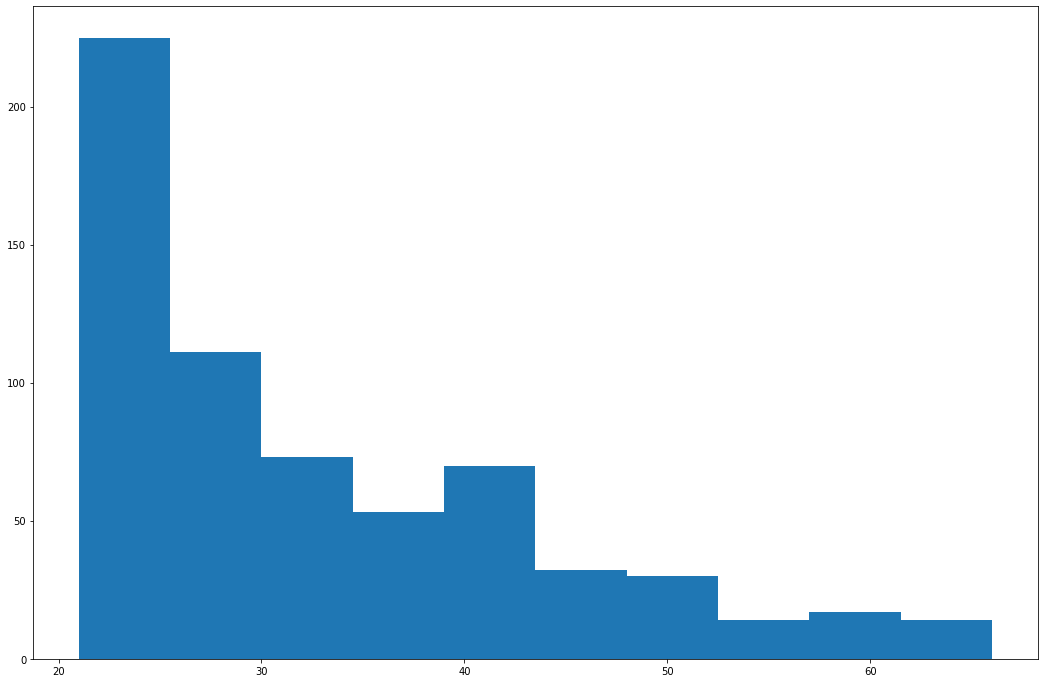

In [223]:
plt.figure(figsize = (18,12))
plt.hist(data["Age"])

#### ML

In [224]:
X_train, X_test , y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)


In [225]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

#### Logistic Regression

In [226]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


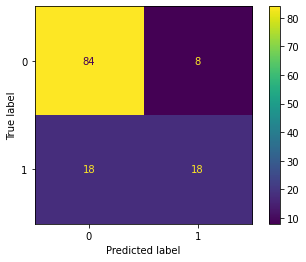

In [227]:
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

In [228]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87        92
           1       0.69      0.50      0.58        36

    accuracy                           0.80       128
   macro avg       0.76      0.71      0.72       128
weighted avg       0.79      0.80      0.79       128



In [229]:

rms = mean_squared_error(y_test, lr_pred, squared=False)
print(rms)

0.45069390943299864


In [230]:
#printing the accuracy for test set
print('Accuracy of Logistic regression model is {}'.format(accuracy_score(y_test,lr_pred)*100))

Accuracy of Logistic regression model is 79.6875


/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


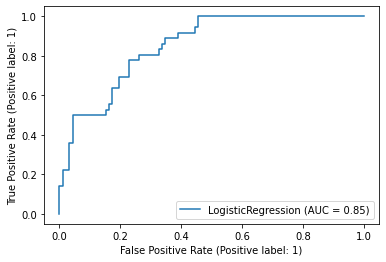

In [231]:
metrics.plot_roc_curve(lr,X_test, y_test)

##### Decision Tree model

In [232]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dt.fit(X_train, y_train)
dp = dt.predict(X_test)
classification_report(y_test,dp)

'              precision    recall  f1-score   support\n\n           0       0.80      0.93      0.86        92\n           1       0.71      0.42      0.53        36\n\n    accuracy                           0.79       128\n   macro avg       0.76      0.68      0.70       128\nweighted avg       0.78      0.79      0.77       128\n'

#### Visual confusion matrix

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


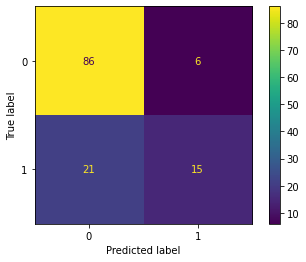

In [233]:
plot_confusion_matrix(dt, X_test, y_test)

In [234]:
#printing the accuracy for test set
print('Accuracy of Decision Tree model is {}'.format(accuracy_score(y_test,dp)*100))

Accuracy of Decision Tree model is 78.90625


In [235]:

rms = mean_squared_error(y_test, dp, squared=False)
print(rms)

0.4592793267718459


/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


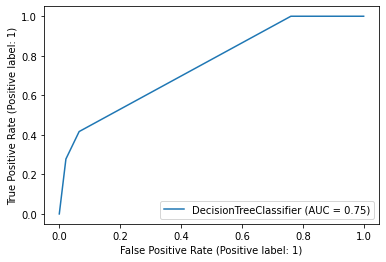

In [236]:
metrics.plot_roc_curve(dt,X_test,y_test)

#### Randomforest

In [237]:
rf = RandomForestClassifier().fit(X_train,y_train)
rp = rf.predict(X_test)

In [238]:
print(classification_report(y_test, rp))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        92
           1       0.68      0.69      0.68        36

    accuracy                           0.82       128
   macro avg       0.78      0.78      0.78       128
weighted avg       0.82      0.82      0.82       128



/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


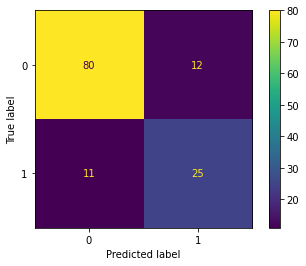

In [239]:
plot_confusion_matrix(rf,X_test,y_test)

In [240]:
#printing the accuracy for test set
print('Accuracy of Random forest model is {}'.format(accuracy_score(y_test,rp)*100))

Accuracy of Random forest model is 82.03125


/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


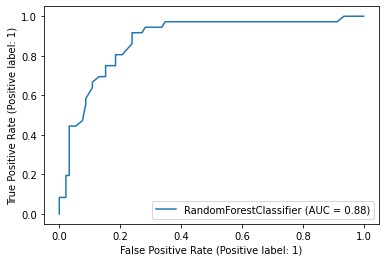

In [241]:
metrics.plot_roc_curve(rf, X_test, y_test)

In [242]:

rms = mean_squared_error(y_test, rp, squared=False)
print(rms)

0.42389562394532926


#### Overall error and accuracy in Random forest is good among other models